The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


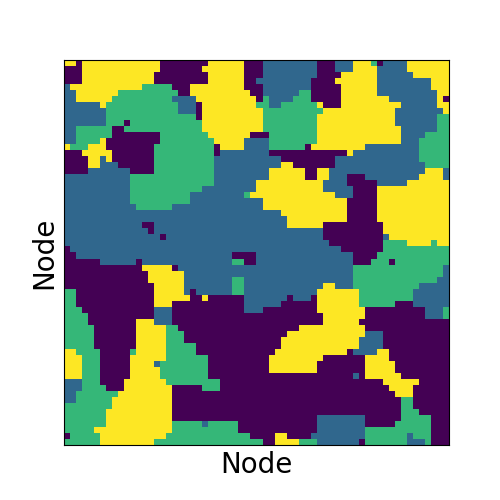

interactive(children=(IntSlider(value=0, description='time_step', max=9999), Output()), _dom_classes=('widget-…

In [6]:
%load_ext autoreload
%autoreload 2
import sys, networkx as nx, matplotlib.pyplot as plt
sys.path.insert(0, '../')
from Models.potts import Potts
from Models.fastIsing import Ising
import numpy as np

n = 64
g = nx.grid_2d_graph(n, n)
model = Potts(g, agentStates = [0, 1, 2, 3 ])

model.reset()
model.updateType = 'async'
model.t = .5
res = model.simulate(int(1e4))
%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
fig, ax = plt.subplots(figsize = (5,5))
ax.set_xlabel('Node', fontsize = 20)
ax.set_ylabel('Node', fontsize = 20)
ax.set(xticks = [], yticks = [])
h = ax.imshow(res[0].reshape(n,n), aspect = 'equal')
def update(time_step = 0):
    try:
        h.set_data(res[time_step].reshape(n,n))
#     ax.set_title(f'Time = {time_step}')
        fig.canvas.draw()
    except Exception as e: print(e)
interact(update, time_step = widgets.IntSlider(min = 0, max = res.shape[0]-1, value = 0));

<IPython.core.display.Javascript object>


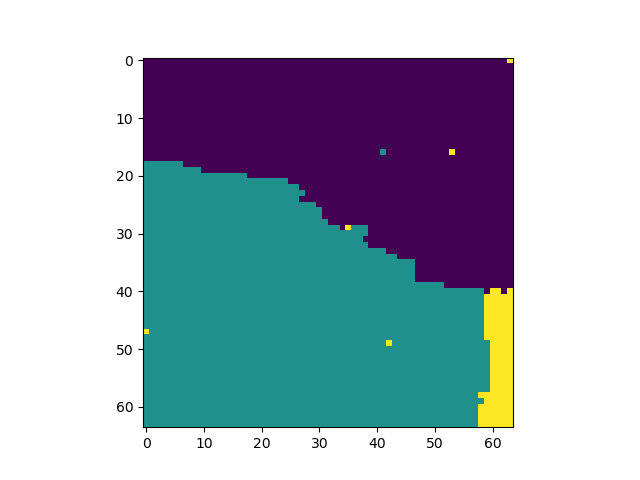

In [5]:
fig, ax = plt.subplots()
ax.imshow(res[-1].reshape(n, n))

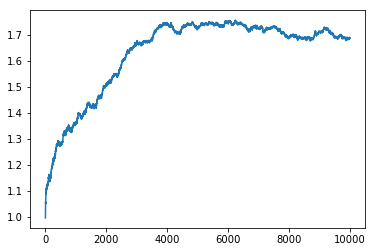

In [3]:
fig, ax = plt.subplots()
ax.plot(res.mean(1))
